In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import yfinance as yf

pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns


In [28]:
# Ticker symbol for ITC
ticker_symbol = "^NSEBANK"  # For the National Stock Exchange of India

# Fetch historical data
data = yf.download(ticker_symbol, period="5d", interval="1m")

print(data)

[*********************100%%**********************]  1 of 1 completed

                                   Open          High           Low  \
Datetime                                                              
2024-03-14 09:15:00+05:30  46825.750000  46834.449219  46711.898438   
2024-03-14 09:16:00+05:30  46731.898438  46731.898438  46625.750000   
2024-03-14 09:17:00+05:30  46671.000000  46679.648438  46593.500000   
2024-03-14 09:18:00+05:30  46606.800781  46633.898438  46577.800781   
2024-03-14 09:19:00+05:30  46582.300781  46628.398438  46573.351562   
...                                 ...           ...           ...   
2024-03-20 15:25:00+05:30  46338.449219  46349.398438  46331.550781   
2024-03-20 15:26:00+05:30  46347.550781  46353.750000  46309.601562   
2024-03-20 15:27:00+05:30  46317.800781  46346.351562  46314.101562   
2024-03-20 15:28:00+05:30  46344.750000  46378.449219  46339.699219   
2024-03-20 15:29:00+05:30  46370.750000  46386.300781  46365.851562   

                                  Close     Adj Close  Volume  
Datetime    

In [30]:
# adding ema 



def ema_cross_over(short_ema,long_ema,data):

    data['EMA_short'] = data['Close'].ewm(span=short_ema,adjust=False).mean()
    data['EMA_long'] = data['Close'].ewm(span=long_ema,adjust=False).mean()

    holding = False
    qty = 10
    trade_book = []
    buy_price = 0


    for index,row in data.iterrows():

        price = row['Close']
        date = index


        if row['EMA_short']>row['EMA_long'] and not holding:
            print('Buying Signal Recieved')
            print(f'Price : {price}, Qty : {qty}\n')
            buy_price = price
            trade_book.append({
                'Date': date,
                'Price': price,
                'Qty':  qty,
                'Order Value': price*qty,
                'Profit Per Unit': 0,
                'Total Profit': 0

            })


            holding = True

        elif row['EMA_short']<row['EMA_long'] and holding:

            profit = price-buy_price
            print('Selling Signal Received')
            print(f'Price : {price}, Qty : {qty}\n')
            trade_book.append({
                'Date': date,
                'Price': price,
                'Qty':  qty,
                'Order Value': price*qty,
                'Profit Per Unit': profit,
                'Total Profit':profit*qty
            })
            holding = False
    df = pd.DataFrame(trade_book)
    profit_total = df['Total Profit'].sum()
    return profit_total
    

In [31]:
analysis = []

for long in range(1,50):
    for short in range(1,49):
        if short<long:
            profit1 = ema_cross_over(short,long,data)
            analysis.append({
                'long_ema':long,
                'short_ema':short,
                'profit': profit1
            })
            
            


Buying Signal Recieved
Price : 46627.69921875, Qty : 10

Selling Signal Received
Price : 46708.19921875, Qty : 10

Buying Signal Recieved
Price : 46755.44921875, Qty : 10

Selling Signal Received
Price : 46765.75, Qty : 10

Buying Signal Recieved
Price : 46708.8984375, Qty : 10

Selling Signal Received
Price : 46760.6015625, Qty : 10

Buying Signal Recieved
Price : 46766.69921875, Qty : 10

Selling Signal Received
Price : 46768.1015625, Qty : 10

Buying Signal Recieved
Price : 46769.1484375, Qty : 10

Selling Signal Received
Price : 46757.55078125, Qty : 10

Buying Signal Recieved
Price : 46728.25, Qty : 10

Selling Signal Received
Price : 46753.1484375, Qty : 10

Buying Signal Recieved
Price : 46777.94921875, Qty : 10

Selling Signal Received
Price : 46800.8984375, Qty : 10

Buying Signal Recieved
Price : 46818.8515625, Qty : 10

Selling Signal Received
Price : 46815.0, Qty : 10

Buying Signal Recieved
Price : 46808.69921875, Qty : 10

Selling Signal Received
Price : 46778.8984375, Qt

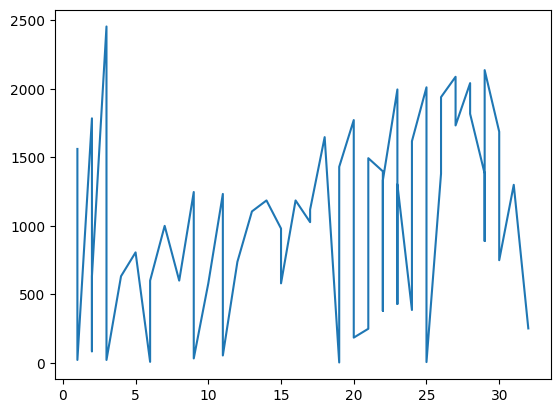

In [52]:
df2 = pd.DataFrame(analysis)
df2 = df2[df2['profit']>0]
df2['diff'] = df2['long_ema']-df2['short_ema']
df2 = df2.sort_values(by='diff')
plt.plot(df2['diff'],df2['profit'])
plt.show()


In [53]:
df2

long_ema  short_ema       profit  diff
0            2          1  1561.835938     1
527         33         32   806.992188     1
779         40         39    21.953125     1
1            3          1  1785.195312     2
463         31         29    85.078125     2
559         34         32   633.007812     2
3            4          1  2455.546875     3
558         34         31   806.992188     3
817         41         38    21.953125     3
591         35         31   633.007812     4
590         35         30   806.992188     5
522         33         27     8.046875     6
624         36         30   600.976562     6
623         36         29  1000.507812     7
658         37         29   600.976562     8
657         37         28  1247.500000     9
586         35         26    33.046875     9
693         38         28   580.976562    10
692         38         27  1233.476562    11
619         36         25    54.570312    11
729         39         27   737.968750    12
728         39         26  1105.976562    13
766         40         26  1185.976562    14
765         40         25   980.976562    15
805         41         26   580.976562    15
804         41         25  1185.976562    16
844         42         25  1027.460938    17
803         41         24  1119.492188    17
843         42         24  1647.968750    18
801         41         22     3.515625    19
842         42         23  1425.468750    19
884         43         24  1431.445312    19
883         43         23  1772.460938    20
926         44         24   184.960938    20
840         42         21   249.531250    21
882         43         22  1222.968750    21
925         44         23  1494.453125    21
968         45         23  1398.437500    22
881         43         21   380.000000    22
924         44         22  1332.460938    22
967         45         22  1995.976562    23
880         43         20   430.585938    23
923         44         21  1303.437500    23
922         44         20   386.562500    24
966         45         21  1252.460938    24
1011        46         22  1618.437500    24
965         45         20  2011.484375    25
1010        46         21  1575.468750    25
1056        47         22     6.484375    25
1009        46         20  1381.484375    26
1055        47         21  1939.960938    26
1101        48         21  2088.437500    27
1008        46         19  2007.539062    27
1054        47         20  1733.476562    27
1100        48         20  2041.992188    28
1053        47         19  1817.968750    28
1099        48         19  1381.484375    29
1052        47         18   890.000000    29
1147        49         20  2136.953125    29
1146        49         19  1687.500000    30
1098        48         18   749.960938    30
1145        49         18  1299.960938    31
1144        49         17   251.992188    32

In [27]:
df = pd.DataFrame(trade_book)
print(f'Total Profit = {df["Total Profit"].sum()} | Frequency = {df["Total Profit"].count()}')
df

Total Profit = -2313.6328125 | Frequency = 69


Date         Price  Qty    Order Value  \
0  2024-03-18 09:16:00+05:30  46507.601562   10  465076.015625   
1  2024-03-18 09:35:00+05:30  46486.398438   10  464863.984375   
2  2024-03-18 09:56:00+05:30  46511.750000   10  465117.500000   
3  2024-03-18 10:08:00+05:30  46440.699219   10  464406.992188   
4  2024-03-18 10:19:00+05:30  46455.000000   10  464550.000000   
..                       ...           ...  ...            ...   
64 2024-03-20 14:45:00+05:30  46291.898438   10  462918.984375   
65 2024-03-20 14:56:00+05:30  46266.449219   10  462664.492188   
66 2024-03-20 14:58:00+05:30  46286.648438   10  462866.484375   
67 2024-03-20 15:08:00+05:30  46269.050781   10  462690.507812   
68 2024-03-20 15:14:00+05:30  46316.949219   10  463169.492188   

    Profit Per Unit  Total Profit  
0          0.000000      0.000000  
1        -21.203125   -212.031250  
2          0.000000      0.000000  
3        -71.050781   -710.507812  
4          0.000000      0.000000  
..              ...           ...  
64         0.000000      0.000000  
65       -25.449219   -254.492188  
66         0.000000      0.000000  
67       -17.597656   -175.976562  
68         0.000000      0.000000  

[69 rows x 6 columns]

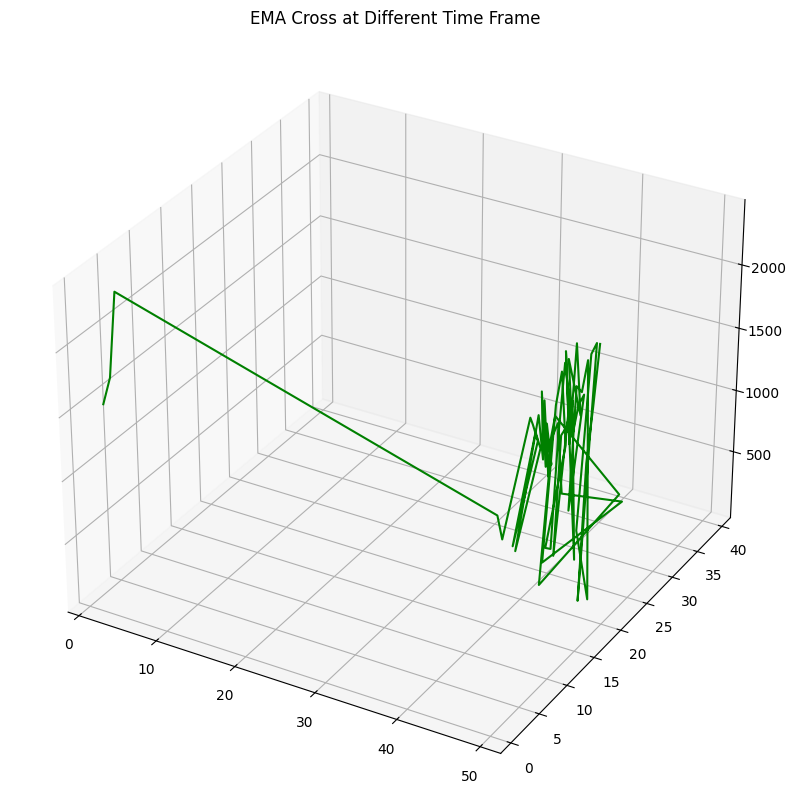

In [44]:
 #importing mplot3d toolkits
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
 
fig = plt.figure(figsize=(10,10))
 
# syntax for 3-D projection
ax = plt.axes(projection ='3d')
 
x = df2['long_ema']
y = df2['short_ema']
z = df2['profit']


#plotting
ax.plot3D(x, y, z, 'green')
ax.set_title('EMA Cross at Different Time Frame')
plt.show()